In [1]:
import os
from spatialdata import SpatialData, read_zarr
from tifffile import imread
from spatialdata.models import Image2DModel, Labels2DModel, TableModel

In [2]:
zarr_path = r'R:\data_analysis\Kasia\BRCAOS_020824_Analysis\sd_test.zarr'

In [3]:
sdata = read_zarr(zarr_path)
print(sdata)

SpatialData object with:
├── Images
│     ├── '1_Cy3_ERa-AF555': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_Cy5_pRB-AF647': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_Cy7_p21-AF750': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_DAPI_': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_FITC_HER2-AF488': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_Cy3_pH2AX-AF555': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_Cy5_cycE1-AF647': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_Cy7_RB-AF750': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_DAPI_': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_FITC_cycE2-AF488'

In [ ]:
from napari_spatialdata import Interactive

interactive = Interactive(sdata)
interactive.run()

2024-05-21 15:34:18.185 | INFO     | napari_spatialdata._scatterwidgets:plot:258 - Plotting coordinates.
2024-05-21 15:34:35.194 | ERROR    | napari_spatialdata._scatterwidgets:_onAction:134 - '[None] not in index'
2024-05-21 15:34:36.443 | INFO     | napari_spatialdata._scatterwidgets:plot:258 - Plotting coordinates.
c:\Users\KMK280\AppData\Local\anaconda3\envs\napari-sp-stable-env\lib\site-packages\napari_spatialdata\_scatterwidgets.py:262: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.scatterplot = self.axes.scatter(x=self.data[0], y=self.data[1], c=self.data[2])
2024-05-21 15:34:49.725 | ERROR    | napari_spatialdata._scatterwidgets:_onAction:134 - '[None] not in index'
2024-05-21 15:34:51.045 | 

In [6]:
sdata

SpatialData object with:
├── Images
│     ├── '1_Cy3_ERa-AF555': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_Cy5_pRB-AF647': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_Cy7_p21-AF750': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_DAPI_': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '1_FITC_HER2-AF488': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_Cy3_pH2AX-AF555': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_Cy5_cycE1-AF647': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_Cy7_RB-AF750': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_DAPI_': MultiscaleSpatialImage[cyx] (1, 6911, 6775), (1, 3455, 3387), (1, 863, 846)
│     ├── '2_FITC_cycE2-AF488'

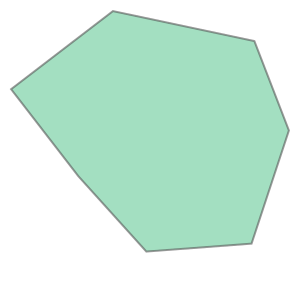

In [8]:
sdata["Shapes"].geometry.iloc[0]

In [9]:
from spatialdata import polygon_query

In [11]:
filtered_tables = {}
for shape in ["Shapes"]:
    polygon = sdata[shape].geometry.iloc[0]
    filtered_tables[shape] = polygon_query(sdata, polygon=polygon, target_coordinate_system="global")["test_table"]

In [22]:
from spatialdata import SpatialData
import pandas as pd

print(SpatialData.get_annotated_regions(sdata["test_table"]))

test_labels


In [21]:
filtered_tables['Shapes'].X.shape

(458, 4)

In [23]:
categories = ["unassigned"] + list(filtered_tables.keys())
n = len(sdata["test_table"])

sdata["test_table"].obs["annotation"] = pd.Categorical(["unassigned" for _ in range(n)], categories=categories)

for shape, subtable in filtered_tables.items():
    in_shape = subtable.obs.index
    sdata["test_table"].obs["annotation"].loc[in_shape] = shape

C:\Users\KMK280\AppData\Local\Temp\ipykernel_5964\2666406449.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sdata["test_table"].obs["annotation"].loc[in_shape] = shape


In [24]:
sdata["test_table"].obs["annotation"].value_counts()

annotation
unassigned    2915
Shapes         458
Name: count, dtype: int64

2024-05-21 16:01:03.658 | INFO     | napari_spatialdata._view:_on_layer_update:285 - Updating layer.
c:\Users\KMK280\AppData\Local\anaconda3\envs\napari-sp-stable-env\lib\site-packages\spatialdata\_core\query\relational_query.py:396: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_df = table.obs.groupby(by=region_column_name)
2024-05-21 16:01:04.419 | INFO     | napari_spatialdata._view:_on_layer_update:285 - Updating layer.
c:\Users\KMK280\AppData\Local\anaconda3\envs\napari-sp-stable-env\lib\site-packages\spatialdata\_core\query\relational_query.py:396: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gro